# Supplementary figures for the data release about the GW190521-maxL waveform

In [ ]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../../utils/plotting.mplstyle')
from matplotlib.lines import Line2D

import seaborn as sns
cp = sns.color_palette('muted')
cp2 = sns.color_palette('pastel')

import sys
sys.path.append('../../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../../data/real_and_maxL_GW190521/'

### Setup

Load data

In [1]:
# Load in the posteriors 
posteriors_dict = h5ify.load('/home/simona.miller/heavy-bbh-td-inference/figures/paper_I/figure_01_posteriors.h5')

# Load in the prior
prior_dict = h5ify.load(data_dir+'prior.h5')

# Load in the maxL parameters
maxL_params = h5ify.load(data_dir+'GW190521_maxL_parameters.h5')

# Load in the strain 
strain_dict = h5ify.load(data_dir+'GW190521_maxL_strain_conditioned.h5')

Set up plotting aesthetics

In [3]:
# the cuts we look at 
cuts_float = [-1.5, -0.5, 0.0, 1.5, 2.0]
cuts = [int(c) if c.is_integer() else c for c in cuts_float]

# parameters we want to look at
params = {
    'chi1':'\chi_1', 
    'chi2':'\chi_2', 
    'tilt1':'\\theta_1', 
    'tilt2':'\\theta_2', 
    'phi12':'\phi_{12}',
    'chi_eff':'\chi_\mathrm{eff}',
    'chi_p_m100M':'\chi_\mathrm{p}'
}

plotting_kws = {
    'maxL pre':dict(color=cp[0], histtype='step', lw=2, density=True, label=r'max. $\mathcal{L}$ pre-$t_\mathrm{cut}$'), 
    'maxL post':dict(color=cp[1], histtype='step', lw=2, density=True, label=r'max. $\mathcal{L}$ post-$t_\mathrm{cut}$'), 
    'maxL full':dict(color='k', histtype='step', lw=2, density=True, label=r'max. $\mathcal{L}$ full'), 
    
    'realData pre':dict(color=cp2[0], histtype='stepfilled', alpha=0.7, density=True, label=r'real data pre-$t_\mathrm{cut}$'), 
    'realData post':dict(color=cp2[1], histtype='stepfilled', alpha=0.7, density=True, label=r'real data post-$t_\mathrm{cut}$'), 
    'realData full':dict(color='k', histtype='stepfilled', alpha=0.3, density=True, label='real data full'), 
    
    'prior':dict(color='gray', lw=2, ls=':', histtype='step', density=True, label='prior')
}

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
/local/simona.miller/ipykernel_4057569/2930335688.py:7: SyntaxWarning: invalid escape sequence '\c'
  'chi1':'\chi_1',
/local/simona.miller/ipykernel_4057569/2930335688.py:8: SyntaxWarning: invalid escape sequence '\c'
  'chi2':'\chi_2',
/local/simona.miller/ipykernel_4057569/2930335688.py:11: SyntaxWarning: invalid escape sequence '\p'
  'phi12':'\phi_{12}',
/local/simona.miller/ipykernel_4057569/2930335688.py:12: SyntaxWarning: invalid escape sequence '\c'
  'chi_eff':'\chi_\mathrm{eff}'

### Make Figure

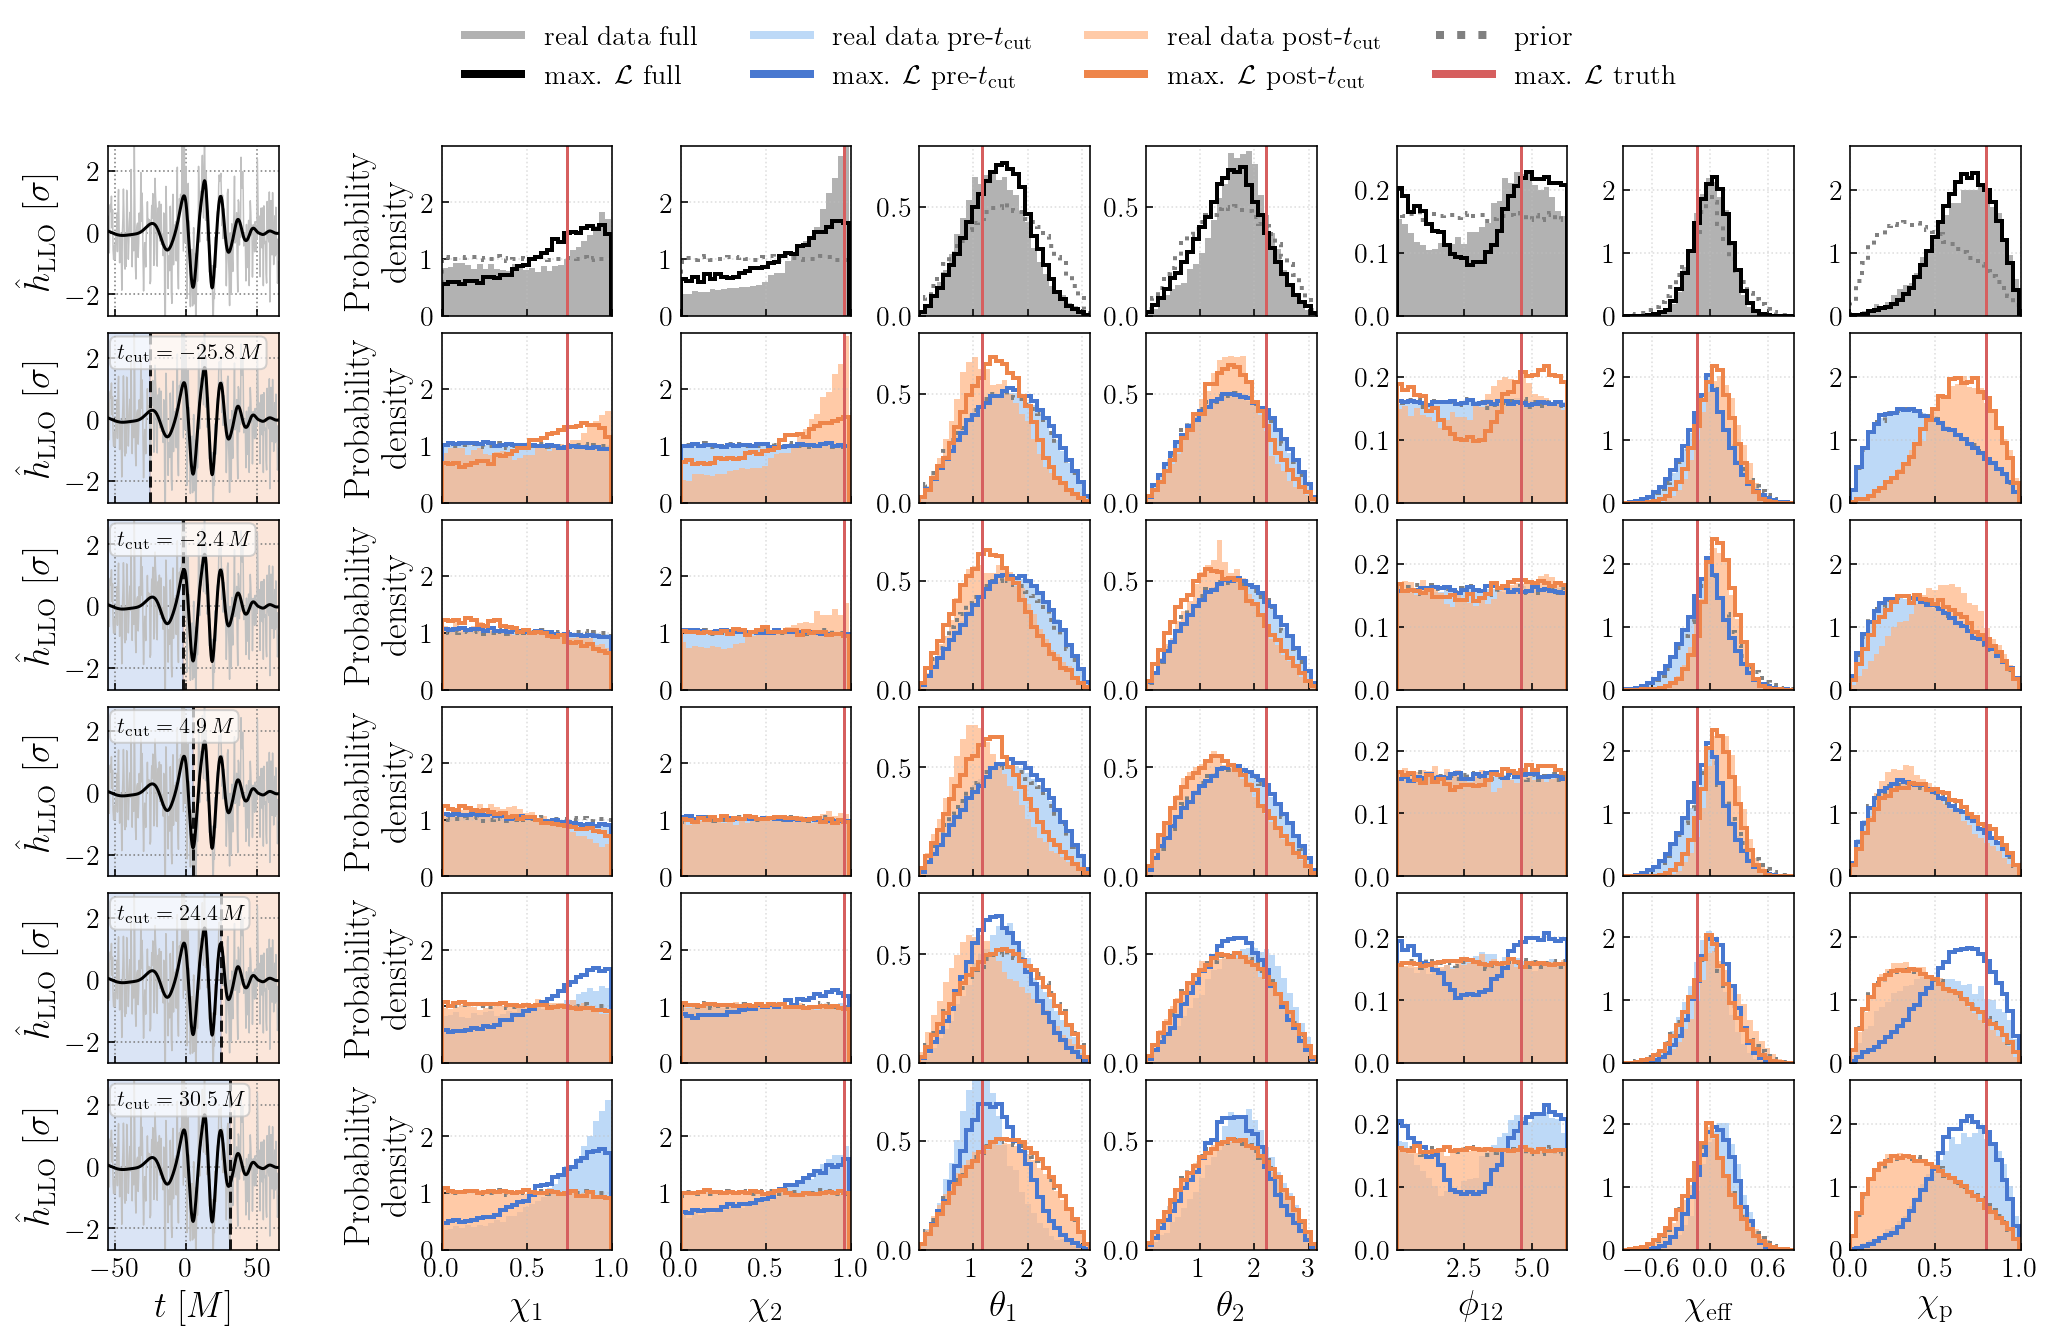

In [4]:
importlib.reload(pf)

ymaxes = {
    'chi1':2.99, 
    'chi2':2.99, 
    'tilt1':0.78, 
    'tilt2':0.78,
    'phi12':0.27,
    'chi_eff':2.7, 
    'chi_p_m100M':2.7
}

custom_xticks = {
    'chi1':[0, 0.5, 1], 
    'chi2':[0, 0.5, 1], 
    'tilt1':[1, 2, 3], 
    'tilt2':[1, 2, 3],
    'phi12':[2.5, 5],
    'chi_eff':[-0.6, 0, 0.6], 
    'chi_p_m100M':[0, 0.5, 1]
}

# get plot
fig, axes = pf.plot_posteriors_and_waveform(
    posteriors_dict, cuts, params, maxL_params, ymaxes, plotting_kws, strain_dict, 
    prior_dict=prior_dict, unit='M', figsize=(1.1*15, 1.1*12/1.3), 
    dxs=[0.01, 0.01, 0.01, 0.005, 0.01, 0.005, 0.0], custom_xticks=custom_xticks
)

# add legend
key_order = ['realData full', 'maxL full', 'realData pre', 'maxL pre', 'realData post', 'maxL post', 'prior']
handles = [
    Line2D(
        [], [],
        color = plotting_kws[x]['color'], 
        label = plotting_kws[x]['label'], 
        alpha = plotting_kws[x]['alpha'] if 'alpha' in plotting_kws[x].keys() else 1, 
        ls = plotting_kws[x]['ls'] if 'ls' in plotting_kws[x].keys() else '-'
    ) 
    for x in key_order
]
handles.append(Line2D([], [], color=cp[3], label=r'max. $\mathcal{L}$ truth'))

legend_kws = dict(
    handles=handles, ncol=int(len(handles)/2), loc='upper center', bbox_to_anchor=(0.5, 0.98), 
    handlelength=2
)

pf.add_legend(fig, **legend_kws)
plt.savefig('real_vs_maxL_all_spin_params.png', dpi=300, bbox_inches='tight')
plt.show()

## $\chi_p$ vs. $\iota$

In [25]:
import pandas as pd

<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:22: SyntaxWarning: invalid escape sequence '\c'
/local/simona.miller/ipykernel_4057569/4060940149.py:21: SyntaxWarning: invalid escape sequence '\i'
  ax.set_ylabel('$|\iota - \pi/2|$')
/local/simona.miller/ipykernel_4057569/4060940149.py:22: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('$\chi_p$')


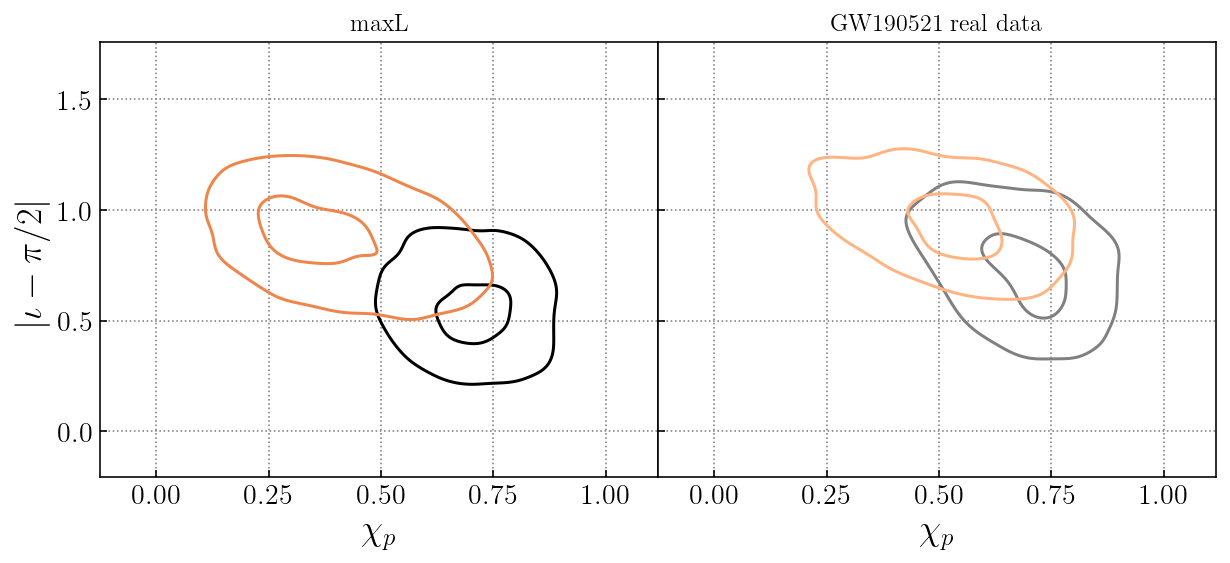

In [34]:
df1 = pd.DataFrame(dict(chi_p = posteriors_dict['maxL']['full']['chi_p'], 
                        iota = np.abs(posteriors_dict['maxL']['full']['iota']-np.pi/2)))
df2 = pd.DataFrame(dict(chi_p = posteriors_dict['maxL']['post -0.5cycles']['chi_p'], 
                        iota = np.abs(posteriors_dict['maxL']['post -0.5cycles']['iota']-np.pi/2)))
df3 = pd.DataFrame(dict(chi_p = posteriors_dict['realData']['full']['chi_p'], 
                        iota = np.abs(posteriors_dict['realData']['full']['iota']-np.pi/2)))
df4 = pd.DataFrame(dict(chi_p = posteriors_dict['realData']['post -0.5cycles']['chi_p'], 
                        iota = np.abs(posteriors_dict['realData']['post -0.5cycles']['iota']-np.pi/2)))

fig, axes = plt.subplots(1,2,figsize=(10,4), sharex=True, sharey=True)

sns.kdeplot(data=df1, x="chi_p", y="iota", ax = axes[0], levels=[0.5,0.9], color='k')
sns.kdeplot(data=df2, x="chi_p", y="iota", ax = axes[0], levels=[0.5,0.9], color=cp[1])
sns.kdeplot(data=df3, x="chi_p", y="iota", ax = axes[1], levels=[0.5,0.9], color='gray')
sns.kdeplot(data=df4, x="chi_p", y="iota", ax = axes[1], levels=[0.5,0.9], color=cp2[1])

axes[1].set_title('GW190521 real data')
axes[0].set_title('maxL')

for ax in axes: 
    ax.set_ylabel('$|\iota - \pi/2|$')
    ax.set_xlabel('$\chi_p$')
    
plt.subplots_adjust(wspace=0)
plt.savefig('real_vs_maxL_chip_vs_iota.png', dpi=300, bbox_inches='tight')
plt.show()